## Visualizing what convnets learn

# Visualizing intermediate activations

Visualizing intermediate convnet outputs ("intermediate activations").

In [1]:
import os
import cv2
import imghdr
import numpy as np

In [2]:
import keras
keras.__version__

'2.10.0'

In [3]:
from keras.models import load_model

model = load_model(os.path.join('models',"ad_classifier_first_medium30000_Model.keras"))
model.summary()  # As a reminder.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                        

In [4]:
#img_path = r'C:\Users\YannisPC\Downloads\cat.jpeg'
#img_path = r'C:\Users\YannisPC\Downloads\cocacola.jpg'
#img_path = r'C:\Users\YannisPC\Downloads\IMG_1650.JPG' # ath
img_path = r'C:\Users\YannisPC\Downloads\err.jpg' # Elly Heus


In [5]:
# We preprocess the image into a 4D tensor
import keras.utils as image
import numpy as np

img = image.load_img(img_path, target_size=(256, 256))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

# Its shape is (1, 256, 256, 3)
print(img_tensor.shape)

(1, 256, 256, 3)


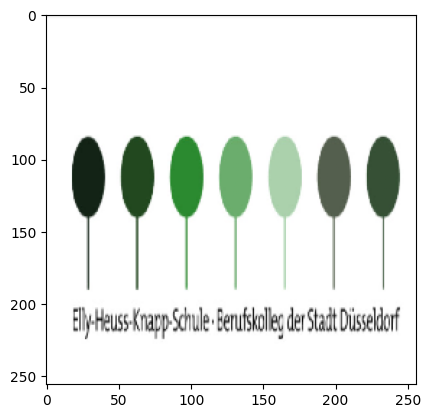

In [6]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

# Prediction of our model

In [7]:
pred = model.predict(img_tensor)
pred

1/1 [==============================] - 0s 147ms/step


array([[0.00037127]], dtype=float32)

In [8]:
#class 1= simple img, class 0 = Ad

if pred > 0.5:
    print(f'Predicted Simple Image')
else:
    print(f'Predicted Ad')

Predicted Ad


# Visualization of intermediate layers

In [9]:
from keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [10]:
# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img_tensor)

1/1 [==============================] - 0s 86ms/step


In [11]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 256, 256, 32)


It's a 256x256 feature map with 32 channels. Let's try visualizing the 3rd channel:

In [12]:
import matplotlib.pyplot as plt

#plt.matshow(first_layer_activation[0, :, :, 17], cmap='viridis')
#plt.show()

In [13]:
#plt.matshow(first_layer_activation[0, :, :, 5], cmap='viridis')
#plt.show()

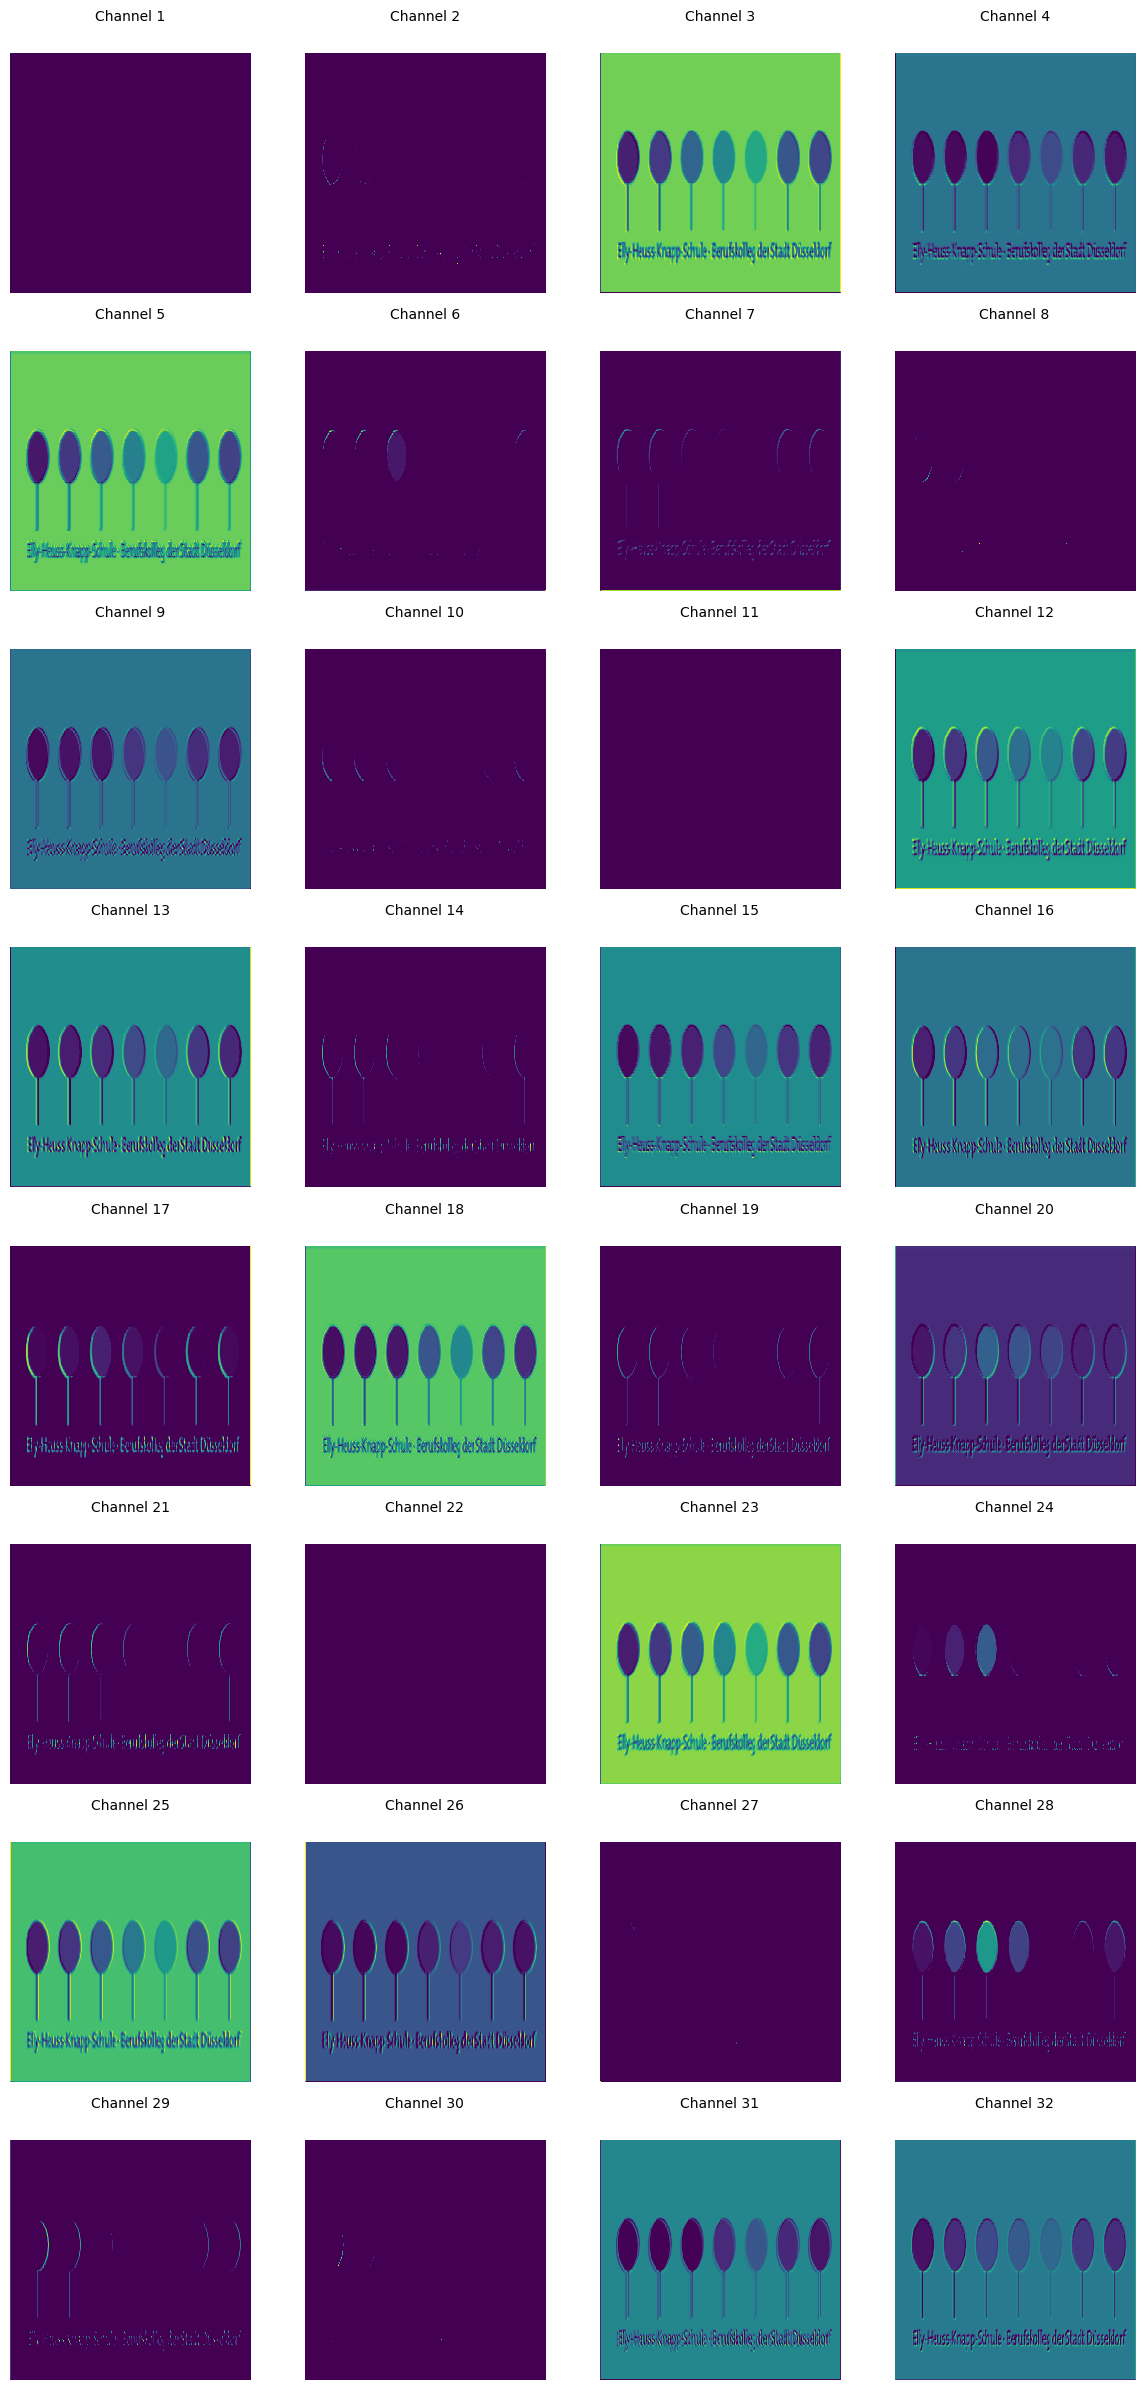

In [14]:
# Number of images to display
num_images = 32

# Create a figure with subplots
fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(12, 24))

for i in range(num_images):
    ax = axes[i // 4, i % 4]  # Get the correct subplot
    ax.matshow(first_layer_activation[0, :, :, i], cmap='viridis')  # Display the image
    ax.set_title(f'Channel {i+1}', fontsize=10)  # Add title with image number
    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()

Create a New Model Without Batch Normalization Layers

In [15]:
from keras.models import Model
from keras.layers import Input

# Get the input layer
input_layer = model.input

# Create a list to hold the new layers
new_layers = []

# Iterate through the original model layers
for layer in model.layers:
    if 'batch_normalization' not in layer.name:
        new_layers.append(layer)

# Define a new input tensor for the new model
x = input_layer

# Reconstruct the new model by applying the new layers in sequence
for layer in new_layers:
    x = layer(x)

# Create the new model
new_model = Model(inputs=input_layer, outputs=x)

In [16]:
new_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       7385

In [17]:
import keras

# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in new_model.layers[:9]:  #new_model
    layer_names.append(layer.name)
print(layer_names)

['conv2d_input', 'conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'conv2d_3', 'max_pooling2d_3']


In [18]:
# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in new_model.layers[:8] if 'batch_normalization' not in layer.name] #if 'batch_normalization' not in layer.name]
# Creates a model that will return these outputs, given the model input:
activation_new_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [19]:
activations_new = activation_model.predict(img_tensor)

1/1 [==============================] - 0s 26ms/step


In [20]:
layer_names = []
for layer in new_model.layers[:9]:
    layer_names.append(layer.name)
print(layer_names)

['conv2d_input', 'conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'conv2d_3', 'max_pooling2d_3']


In [21]:
for layer_name, layer_activation in zip(layer_names, activations_new):
    print(layer_name)

conv2d_input
conv2d
max_pooling2d
conv2d_1
max_pooling2d_1
conv2d_2
max_pooling2d_2
conv2d_3


In [22]:
first_layer_activation = activations[1]
print(first_layer_activation.shape)

(1, 128, 128, 32)


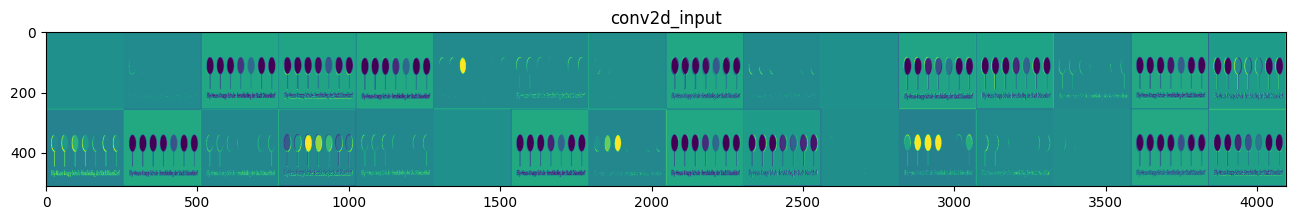

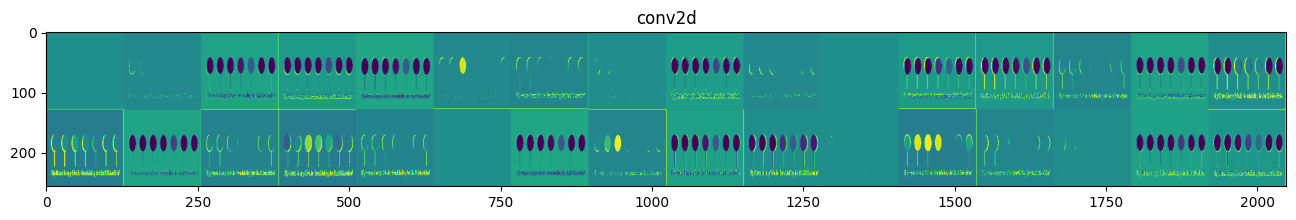

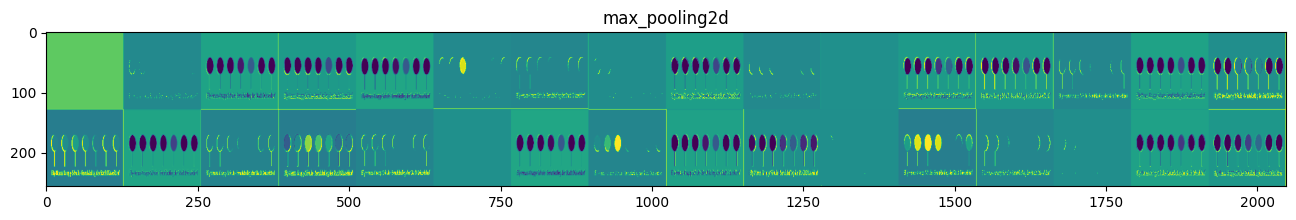

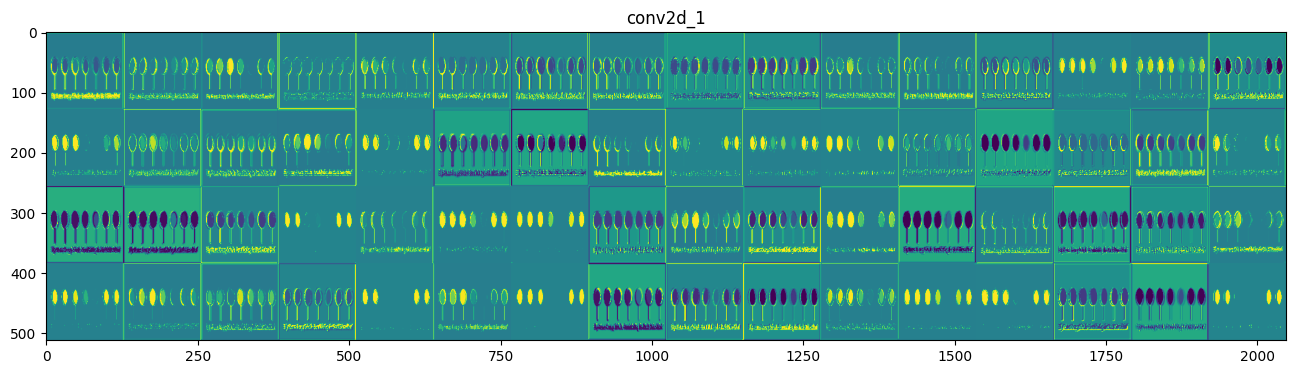

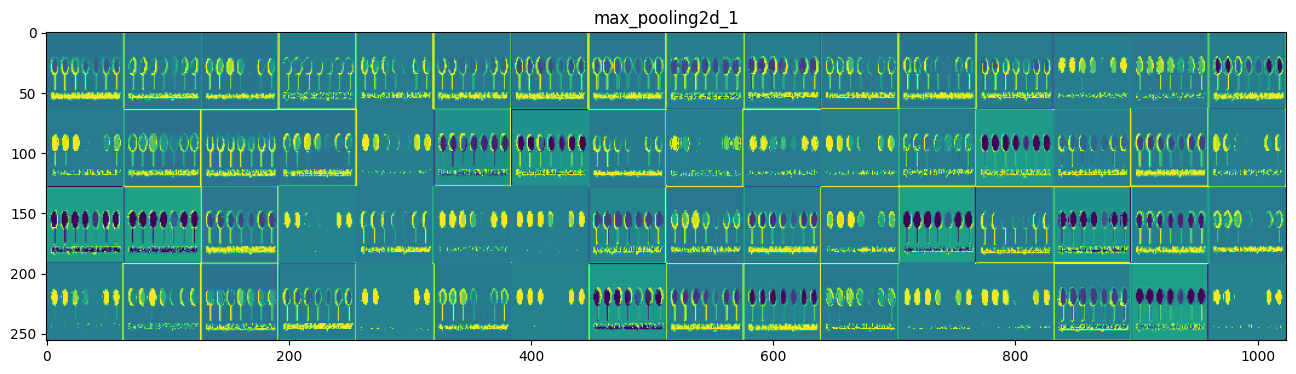

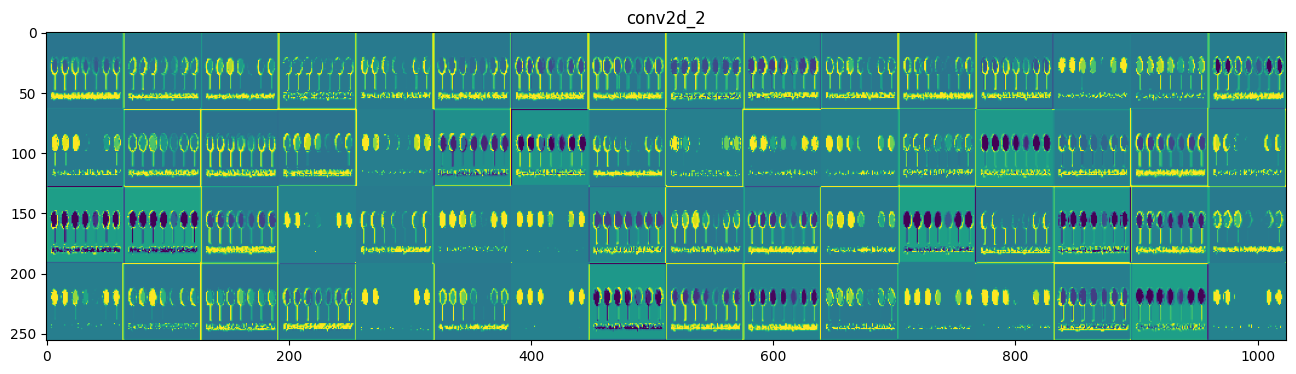

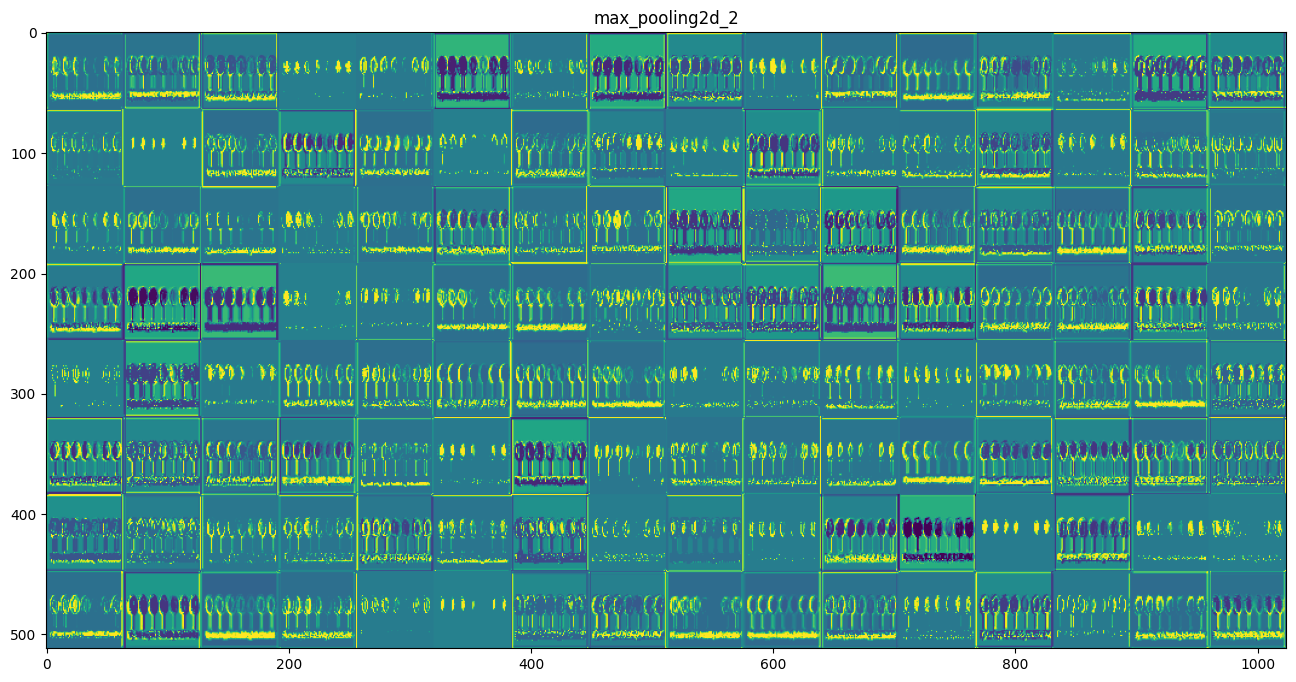

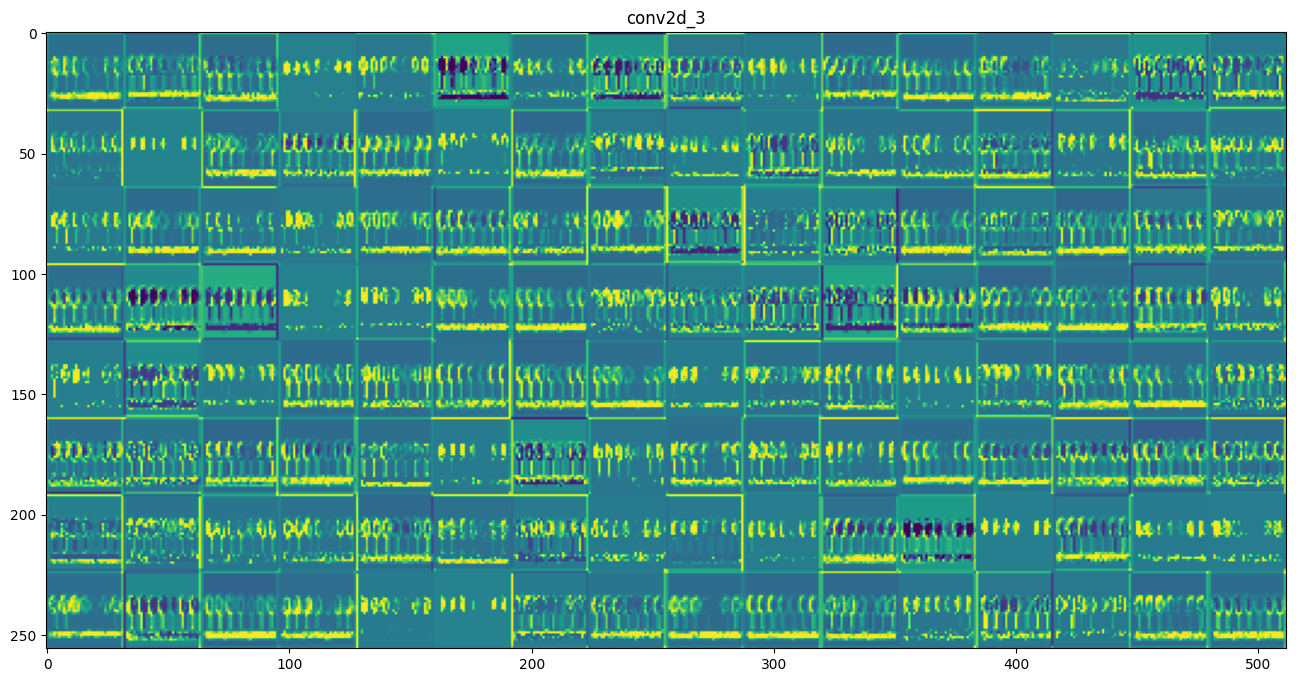

In [23]:
images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations_new):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            

            mean = channel_image.mean()
            std = channel_image.std()
            if std == 0:
                std = 1e-5  # Prevent division by zero

            # Post-process the feature to make it visually palatable
            channel_image -= mean
            channel_image /= std
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()